# **1. Import Library**

Beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file hasil_clustering.CSV ke dalam variabel DataFrame.

In [2]:
product_df = pd.read_csv("dataset/hasil_clustering.csv")
product_df.head()

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,payment_made,product_volume_cm3,product_complexity,order_status_encoded,cluster_category
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,0.076074,0.118669,8d5266042046a06655c8db133d120ba5,0.750,perfumery,2018-07,0.025243,0.801347,1.0,0.004131,0.042601,2,2
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,0.102670,0.100203,e73b67b67587f7644d5bd1a52deb1b01,1.000,auto,2018-08,0.017476,0.821549,0.0,0.008035,0.060289,2,1
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,0.028500,0.141829,359d03e676b3c069f62cadba8dd3f6e8,1.000,pet_shop,2017-11,0.025243,0.813131,1.0,0.004695,0.122820,2,2
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,0.038176,0.079078,07d67dd06ed5f88bef11ef6b464e79ae,1.000,auto,2017-05,0.017476,0.811448,0.0,0.010608,0.243896,2,1
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,0.012297,0.083668,fc4af8aea8ec3f1a3cd181d3d0cadbd5,0.375,furniture_decor,2017-01,0.017476,0.845118,1.0,0.010608,0.109118,2,2


In [3]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58765 entries, 0 to 58764
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       58765 non-null  object 
 1   customer_id                    58765 non-null  object 
 2   order_status                   58765 non-null  object 
 3   order_item_id                  58765 non-null  int64  
 4   product_id                     58765 non-null  object 
 5   price                          58765 non-null  float64
 6   freight_value                  58765 non-null  float64
 7   review_id                      58765 non-null  object 
 8   review_score                   58765 non-null  float64
 9   product_category_name_english  58765 non-null  object 
 10  order_purchase_date            58765 non-null  object 
 11  shipping_duration_days         58765 non-null  float64
 12  delivery_accuracy_days         58765 non-null 

In [4]:
print(f"Dataset memiliki {product_df.shape[0]} baris dan {product_df.shape[1]} kolom.\n")

Dataset memiliki 58765 baris dan 18 kolom.



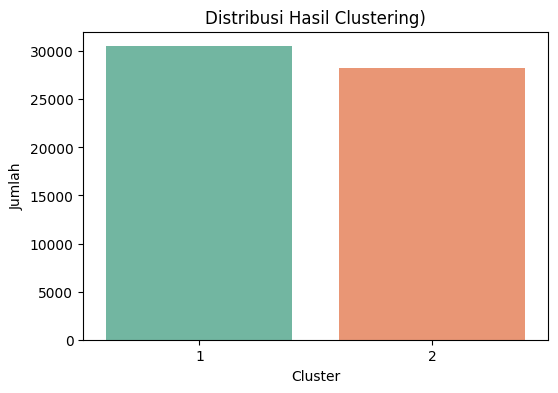

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=product_df, x='cluster_category', palette='Set2', hue='cluster_category', dodge=False, legend=False)
plt.title('Distribusi Hasil Clustering)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

# **3. Data Splitting**

## **a. Pemilihan Fiture**

**Pertanyaan Bisnis yang Diambil**

Supervised Learning: Produk mana yang berpotensi untuk lebih laku berdasarkan karakteristik yang telah dikelompokkan?



Untuk pemilihan data, dibagi menjadi fitur X (variabel independen) dan target y (variabel dependen).Pembagian ini memastikan model dilatih menggunakan fitur yang relavan sehingga hasil prediksi menjadi lebih akurat.



Metode assign digunakan untuk mengklasifikasikan produk berdasarkan aturan logis yang didasarkan pada karakteristik seperti kategori, skor ulasan, akurasi pengiriman, dan kompleksitas produk. Pendekatan ini memungkinkan identifikasi produk yang berpotensi laku atau tidak laku secara cepat, memberikan dasar analisis sebelum menerapkan model prediktif yang lebih kompleks.

In [6]:
def assign_popularity(row):
    if row['cluster_category'] == 2 and row['review_score'] >= 1.000 and row['delivery_accuracy_days'] >= 0.8 and row['product_complexity'] >= 0.2:
        return '1'
    elif row['cluster_category'] == 1 and row['review_score'] >= 1.000 and row['delivery_accuracy_days'] >= 0.8 and row['product_complexity'] >= 0.2:
        return '1'
    elif row['cluster_category'] == 2 and row['review_score'] < 1.000 and row['delivery_accuracy_days'] < 0.8 and row['product_complexity'] < 0.2:
        return '2'
    elif row['cluster_category'] == 1 and row['review_score'] < 1.000 and row['delivery_accuracy_days'] < 0.8 and row['product_complexity'] < 0.2:
        return '2'
    else:
        return '2'

product_df['popular'] = product_df.apply(assign_popularity, axis=1)

- Penentuan nilai popular pada variabel depanden (y) didasarkan pada kombinasi beberapa faktor fitur, dan untuk nilainnya diambil dari evaluasi hasil clustering dengan mengambil nilai rata rata tertinggi/terbaik, sehingga bisa menghasilkan produk yang berpotensi lebih laku dan kualitas tertinggi berdasarkan beberapa aspek berikut:

  1. **cluster_category:** Kategori produk berdasarkan hasil clustering, yang menunjukkan kelompok produk dengan performa serupa. (cluster 1 dan 2)

  2. **review_score:** Skor ulasan produk, dengan produk yang mendapat skor tinggi dianggap lebih populer. (rata rata tertinggi di index >=1.0)

  3. **delivery_accuracy_days:** Keakuratan pengiriman, di mana produk yang dikirim tepat waktu lebih dipercaya dan lebih mungkin laris. (rata rata tepat waktu di index >=0.8)

  4. **product_complexity:** Keterangan informasi tentang produk, agar produk yang mudah dipahami (rata rata kompelsitas informasi terbaik di index >=0.2)

- Untuk nilai popular diatur menjadi:
    - (1) (laris) jika produk memiliki kriteria yang baik dalam aspek-aspek di atas.
    - (2) (tidak laku) jika produk tidak memenuhi kriteria tersebut.

In [7]:
all_features = [
  'price',
  'freight_value',
  'review_score',
  'shipping_duration_days',
  'delivery_accuracy_days',
  'product_complexity',
  'order_status_encoded',
  'cluster_category'
]

X = product_df[all_features]
y = product_df['popular']

Untuk Fitur X (Variabel Independen) dipilih beberapa fitur berikut yang relavan:

  1. **price (Harga):** Harga memengaruhi keputusan beli konsumen. Produk dengan harga kompetitif lebih laku.

  2. **freight_value (Biaya Pengiriman):** Biaya pengiriman yang rendah meningkatkan kenyamanan dan minat beli.
  3. **review_score (Skor Ulasan):** Skor tinggi menunjukkan kepuasan, yang mendorong pembelian ulang.
  4. **shipping_duration_days (Durasi Pengiriman):** Pengiriman cepat meningkatkan kepuasan pelanggan dan kemungkinan pembelian ulang.
  5. **delivery_accuracy_days (Keakuratan Pengiriman):** Pengiriman tepat waktu meningkatkan reputasi dan kepercayaan konsumen.
  6. **product_complexity (Kompleksitas Produk):** Deskripsi produk yang jelas mempermudah keputusan beli dan menambah daya tarik.
  7. **order_status_encoded (Status Pesanan):** Status pengiriman yang terjamin meningkatkan kepercayaan pembeli.
  8. **cluster_category (Kategori Clustering):** Kategori produk yang sukses sebelumnya memiliki potensi untuk laris di masa depan.

## **b. Memisahkan Data**

Data kemudian dibagi menjadi 80% untuk data latih dan 20% untuk data prediksi.

Pembagian ini memastikan model dilatih menggunakan data yang cukup, sementara data prediksi digunakan untuk mengukur kemampuan model dalam memprediksi hasil pada data yang belum pernah dilihat sebelumnya.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **c. Mengecek distribusi target pada training set**

In [9]:
train_distribution = y_train.value_counts()
print("Distribusi Target pada Training Set:")
train_distribution

Distribusi Target pada Training Set:


popular
2    38569
1     8443
Name: count, dtype: int64

## **d. Mengecek distribusi target pada test set**

In [10]:
test_distribution = y_test.value_counts()
print("\nDistribusi Target pada Test Set:")
test_distribution


Distribusi Target pada Test Set:


popular
2    9613
1    2140
Name: count, dtype: int64

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

### 1. Menggunakan Logistic Regresi

#### 1. Pemilihan Algoritma

Logistic Regression (LogReg) dipilih karena sederhana dan efektif dalam mengidentifikasi produk yang berpotensi laku berdasarkan fitur yang jelas, seperti harga, skor ulasan, dan kategori produk. Model ini memberikan hasil yang mudah dipahami, cocok untuk prediksi apakah produk akan populer atau tidak.

In [11]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

#### 2. Latih model menggunakan data latih.

In [12]:
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Akurasi pada data latih menggunakan Logistic Regresi: {accuracy_train:.4f}%")

Akurasi pada data latih menggunakan Logistic Regresi: 0.9610%


In [13]:
report_train = classification_report(y_train, y_train_pred)
print("Classification Report untuk Data Latih menggunakan Logistic Regresi:")
print(report_train)

Classification Report untuk Data Latih menggunakan Logistic Regresi:
              precision    recall  f1-score   support

           1       0.82      1.00      0.90      8443
           2       1.00      0.95      0.98     38569

    accuracy                           0.96     47012
   macro avg       0.91      0.98      0.94     47012
weighted avg       0.97      0.96      0.96     47012



### 2. Menggunakan Support Vector Machine

#### 1. algoritma klasifikasi yang dipilih


Support Vector Machine (SVM) dipilih karena mampu menangani hubungan yang lebih kompleks dan tidak linier antar fitur. Dengan SVM, dapat ditangkap pola-pola yang lebih rumit dalam data yang mungkin tidak terlihat dengan model lain. SVM efektif dalam memberikan prediksi yang lebih akurat, terutama saat data memiliki banyak variabel yang saling mempengaruhi.

In [14]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

#### 2. Latih model menggunakan data latih.

In [15]:
y_train_pred_svm = svm_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred_svm)
print(f"Akurasi pada data latih menggunakan SVM: {accuracy_train:.4f}")

Akurasi pada data latih menggunakan SVM: 0.9574


In [16]:
report_train = classification_report(y_train, y_train_pred_svm)
print("Classification Report untuk Data Latih menggunakan SVM:")
print(report_train)

Classification Report untuk Data Latih menggunakan SVM:
              precision    recall  f1-score   support

           1       0.90      0.85      0.88      8443
           2       0.97      0.98      0.97     38569

    accuracy                           0.96     47012
   macro avg       0.94      0.92      0.93     47012
weighted avg       0.96      0.96      0.96     47012



## **b. Evaluasi Model Klasifikasi**

### 1. Menggunakan Logistic Regression

#### 1. Prediksi menggunakan data uji.

In [17]:
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Akurasi pada data uji menggunakan Logistic Regresi: {accuracy_test:.4f}%")

Akurasi pada data uji menggunakan Logistic Regresi: 0.9616%


#### 2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).


In [18]:
report_test = classification_report(y_test, y_test_pred)
print("Classification Report untuk Data Uji menggunakan Logistic Regresi:")
print(report_test)

Classification Report untuk Data Uji menggunakan Logistic Regresi:
              precision    recall  f1-score   support

           1       0.83      1.00      0.90      2140
           2       1.00      0.95      0.98      9613

    accuracy                           0.96     11753
   macro avg       0.91      0.98      0.94     11753
weighted avg       0.97      0.96      0.96     11753



#### 3. Confusion matrix untuk melihat detail prediksi benar dan salah.

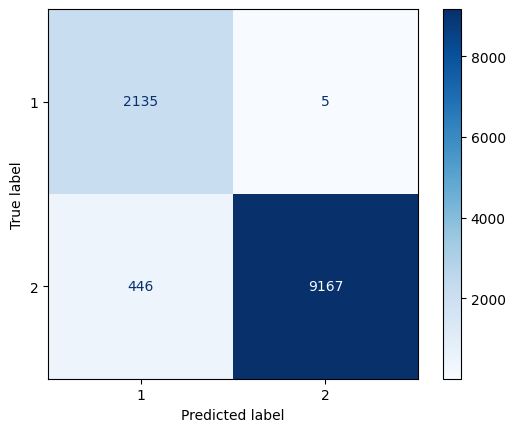

In [19]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')

### 2. Menggunakan Support Vector Machine

#### 1. Prediksi menggunakan data uji.

In [20]:
y_test_pred_svm = svm_model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Akurasi pada data uji menggunakan SVM: {accuracy_test_svm:.4f}")

Akurasi pada data uji menggunakan SVM: 0.9557


#### 2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).


In [21]:
report_test_svm = classification_report(y_test, y_test_pred_svm)
print("Classification Report untuk Data Uji menggunakan SVM:")
print(report_test_svm)

Classification Report untuk Data Uji menggunakan SVM:
              precision    recall  f1-score   support

           1       0.90      0.85      0.87      2140
           2       0.97      0.98      0.97      9613

    accuracy                           0.96     11753
   macro avg       0.93      0.91      0.92     11753
weighted avg       0.95      0.96      0.96     11753



#### 3. Confusion matrix untuk melihat detail prediksi benar dan salah.

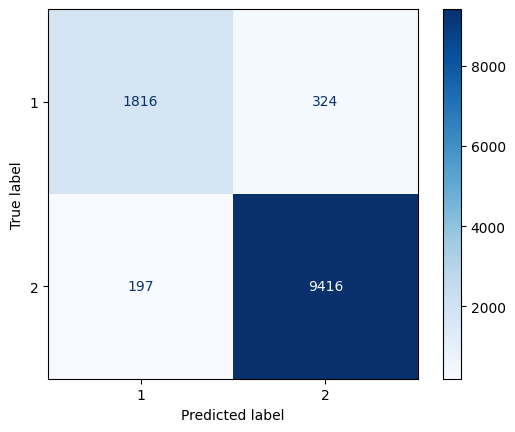

In [22]:
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Blues')
plt.show()

## **c. Hasil evaluasi algoritma**

#### **1. Hasil implementasi Logistic Regression**

 menunjukkan performa model dalam memprediksi kelarisan produk berdasarkan fitur-fitur penting, seperti harga, ulasan pelanggan, dan akurasi pengiriman. Berdasarkan Confusion Matrix yang dihasilkan:

- Prediksi Akurat:
    - Sebanyak 2135 produk laris diprediksi dengan benar sebagai laris.
    - Sebanyak 9167 produk tidak laku diprediksi dengan benar sebagai tidak laku.

- Kesalahan Prediksi:
    - Hanya 5 produk laris yang salah diprediksi sebagai tidak laku.
    - Sebanyak 446 produk tidak laku salah diprediksi sebagai laris.

- Kesimpulan Akurasi:
    -  Akurasi keseluruhan model pada data uji adalah 96.16%, menunjukkan bahwa model dapat membedakan dengan baik antara produk yang laris dan tidak laku.
    - Tingginya nilai precision, recall, dan f1-score mendukung keandalan model dalam menangani data yang tidak seimbang.

#### **2. Hasil implementasi Support Vector Machine**

Model Support Vector Machine (SVM) digunakan untuk memprediksi apakah suatu produk akan populer atau tidak berdasarkan fitur yang tersedia. Dengan menggunakan data uji, model ini menghasilkan akurasi 96%, menunjukkan bahwa prediksi untuk sebagian besar produk akurat.

- Prediksi Akurat:
  - Model SVM berhasil memprediksi 11,753 produk, dengan akurasi 96%. Dari jumlah tersebut
  - ada 2140 produk yang diprediksi sebagai populer dan 9613 produk yang diprediksi tidak populer.

- Kesalahan Prediksi:
  - Model membuat 324 kesalahan dalam memprediksi produk laris (kategori "1")
  - Hanya 197 kesalahan dalam memprediksi produk tidak laris (kategori "2").

- Kesimpulan Akurasi:
  -  Model SVM menunjukkan akurasi yang baik dengan nilai 95.74% pada data latih dan 95.57% pada data uji, yang menunjukkan performa yang stabil.
  - SVM menunjukkan performa sangat baik dengan F1-Score, Precision, dan Recall di atas 95%, menandakan model akurat dalam mengklasifikasi kategori populer.







## **d. Evaluasi Model Klasifikasi**

### **1. Evaluasi untuk Logistic Regression**

#### 1. Mengecek Underfiting dan overfitting Model


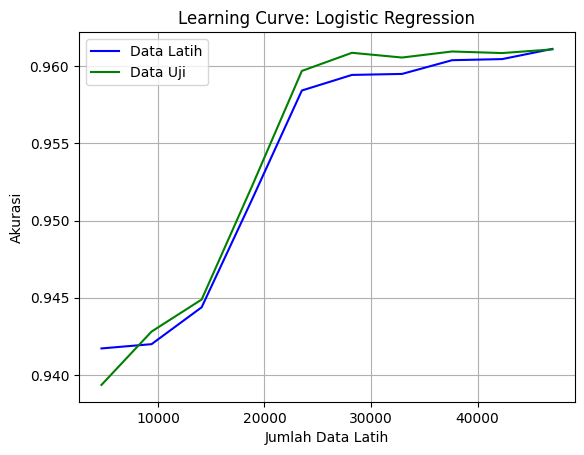

In [23]:
model = LogisticRegression(class_weight='balanced', random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Data Latih', color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Data Uji', color='green')

plt.title('Learning Curve: Logistic Regression')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Hitung hasil metrik evaluasi.

In [24]:
for y_true, y_pred, label in [(y_train, y_train_pred, 'Latih Logistic Regression'), (y_test, y_test_pred, 'Prediksi Logistic Regression')]:
    print(f"\nData {label}:")
    print(f"Akurasi: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")


Data Latih Logistic Regression:
Akurasi: 0.9610
Precision: 0.9679
Recall: 0.9610
F1-Score: 0.9624

Data Prediksi Logistic Regression:
Akurasi: 0.9616
Precision: 0.9681
Recall: 0.9616
F1-Score: 0.9630


#### 3. Menampilkan Prediksi Produk Teratas

In [25]:
from itertools import product
model.fit(X_train, y_train)
product_df['popular'] = model.predict(X)
category_popularity = product_df.groupby(['product_category_name_english', 'popular']).size().unstack(fill_value=0)
top_10_categories = category_popularity['1'].sort_values(ascending=False).head(10)

print("\nPrediksi 10 Kategori Produk Populer dengan Logistic Regression Berdasarkan Karakteristik:")
print(top_10_categories)


Prediksi 10 Kategori Produk Populer dengan Logistic Regression Berdasarkan Karakteristik:
product_category_name_english
sports_leisure           1961
health_beauty            1781
computers_accessories    1209
furniture_decor           774
housewares                770
baby                      606
auto                      489
toys                      474
watches_gifts             469
pet_shop                  463
Name: 1, dtype: int64


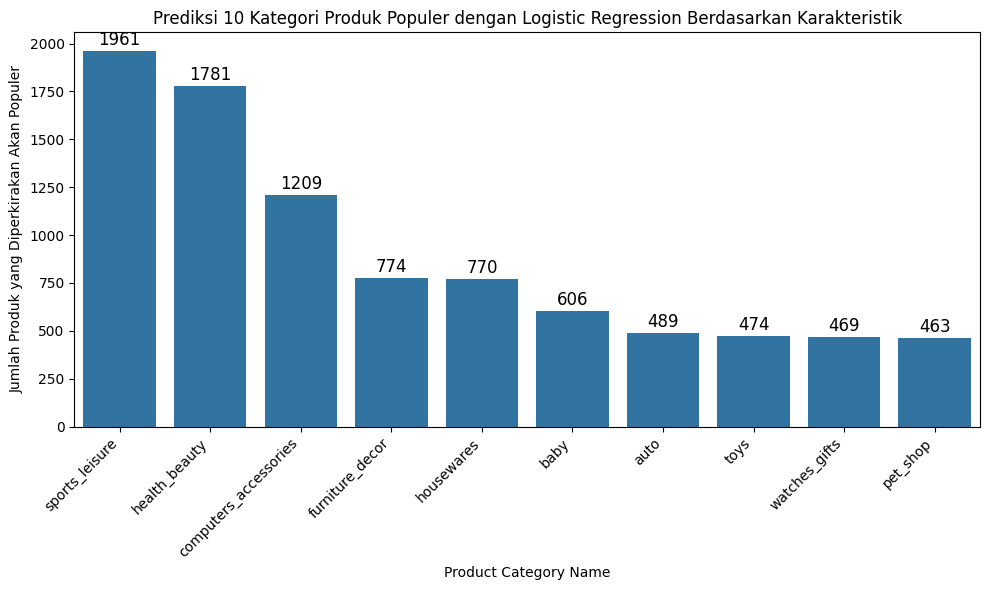

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)

for index, value in enumerate(top_10_categories.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Prediksi 10 Kategori Produk Populer dengan Logistic Regression Berdasarkan Karakteristik')
plt.xlabel('Product Category Name')
plt.ylabel('Jumlah Produk yang Diperkirakan Akan Populer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **2. Evaluasi untuk Support Vector Machine**

#### 1. Mengecek Underfiting dan overfitting Model


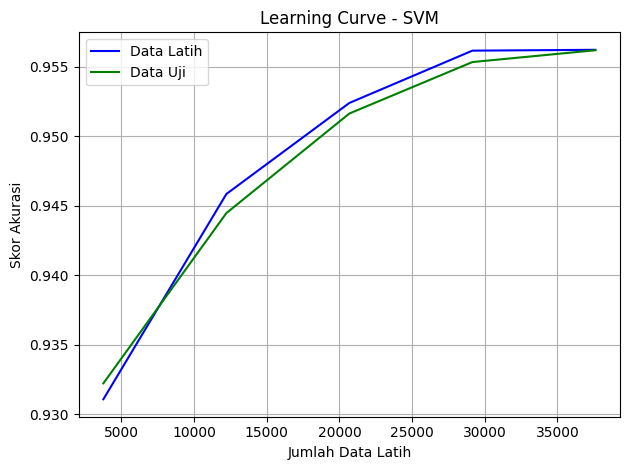

In [27]:
svm_model = SVC(kernel='linear', random_state=42)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Data Latih', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Data Uji', color='green')

plt.title('Learning Curve - SVM')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('Skor Akurasi')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Hitung hasil metrik evaluasi.

In [28]:
for y_true, y_pred, label in [(y_train, y_train_pred_svm, 'Latih SVM'), (y_test, y_test_pred_svm, 'Prediksi SVM')]:
    print(f"\n{label}:")
    print(f"Akurasi: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")


Latih SVM:
Akurasi: 0.9574
Precision: 0.9568
Recall: 0.9574
F1-Score: 0.9569

Prediksi SVM:
Akurasi: 0.9557
Precision: 0.9550
Recall: 0.9557
F1-Score: 0.9551


#### 3. Menampilkan Prediksi Produk Teratas

In [29]:
svm_model.fit(X_train, y_train)
product_df['popular'] = svm_model.predict(X)
category_popularity = product_df.groupby(['product_category_name_english', 'popular']).size().unstack(fill_value=0)
top_10_categories = category_popularity['1'].sort_values(ascending=False).head(10)

print("\nPrediksi 10 Kategori Produk Populer dengan SVM Berdasarkan Karakteristik:")
print(top_10_categories)


Prediksi 10 Kategori Produk Populer dengan SVM Berdasarkan Karakteristik:
product_category_name_english
sports_leisure           1647
health_beauty            1531
computers_accessories    1028
furniture_decor           654
housewares                460
baby                      440
auto                      373
garden_tools              360
watches_gifts             355
pet_shop                  352
Name: 1, dtype: int64


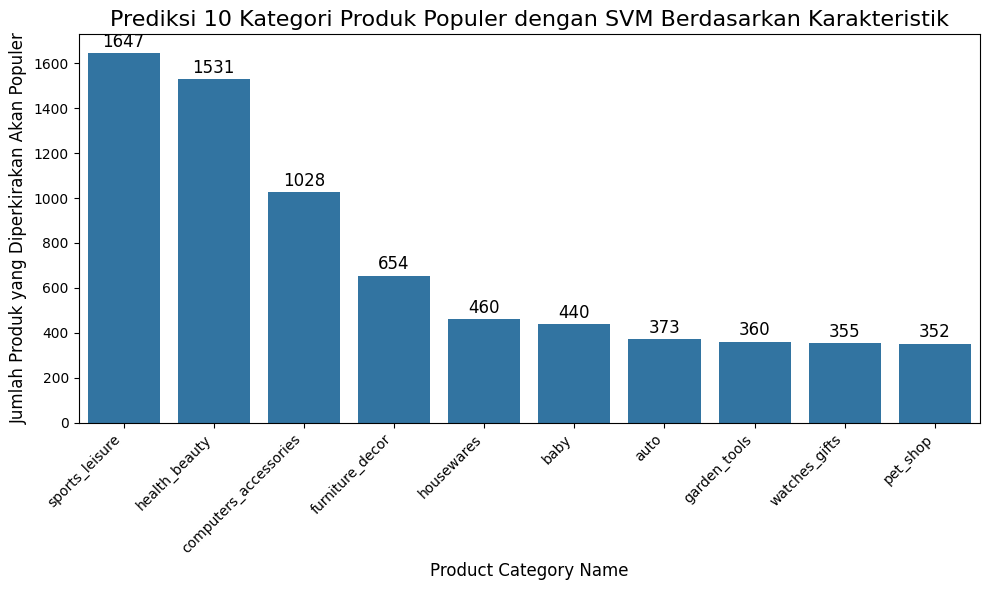

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)

for index, value in enumerate(top_10_categories.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Prediksi 10 Kategori Produk Populer dengan SVM Berdasarkan Karakteristik', fontsize=16)
plt.xlabel('Product Category Name', fontsize=12)
plt.ylabel('Jumlah Produk yang Diperkirakan Akan Populer', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1. Menggunakan Logistic Regresi

- Identifikasi Kelemahan model pada Precision atau Recall rendah untuk kelas tertentu.

  - Pada classification report, terlihat bahwa precision untuk kelas 1 (produk populer) adalah 83%, yang berarti sekitar 17% produk yang diprediksi populer sebenarnya tidak populer. Hal ini menunjukkan kelemahan pada model dalam mengidentifikasi produk populer, di mana beberapa produk yang seharusnya tidak populer masih teridentifikasi sebagai populer.

  - Sementara itu, recall untuk kelas 2 (produk tidak populer) adalah 95%, yang masih cukup tinggi, menunjukkan bahwa sebagian besar produk yang tidak populer berhasil teridentifikasi dengan baik. Secara keseluruhan, kelemahan terbesar terletak pada precision kelas 1, yang perlu diperbaiki untuk mengurangi kesalahan dalam memprediksi produk yang tidak populer sebagai populer.

- Apakah model mengalami overfitting atau underfitting?

  - Model tidak mengalami overfitting atau underfitting, karena perbedaan akurasi antara data latih (96.10%) dan uji (96.16%) sangat kecil, yang menunjukkan kemampuan model untuk menggeneralisasi dengan baik.

### 2. Menggunakan Support Vector Machine

- Identifikasi Kelemahan model pada Precision atau Recall rendah untuk kelas tertentu.
 
    - Model SVM menunjukkan kelemahan pada kelas 1 dengan Recall 0.85, artinya 15% produk tidak populer tidak terdeteksi. Sebaliknya, kelas 2 memiliki Recall 0.98, menunjukkan deteksi yang sangat baik untuk produk populer.


- Apakah model mengalami overfitting atau underfitting?

    - Model SVM tidak menunjukkan tanda-tanda overfitting atau underfitting karena akurasi pada data latih (0.9574) dan data uji (0.9557) cukup konsisten. Hal ini mengindikasikan model mampu menggeneralisasi dengan baik tanpa terlalu terikat pada data latih atau kehilangan kemampuan untuk memprediksi data baru.

### 3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Mungkin untuk rekomendasi lanjutannya:

- Mengumpulkan data tambahan untuk memastikan representasi kelas yang lebih baik dalam dataset

- Mencoba algoritma lain seperti Random Forest atau Gradient Boosting untuk meningkatkan akurasi dan menangani masalah varians